<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Assignments/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [ ]:
df

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [ ]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [ ]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [ ]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [ ]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [ ]:
New_dataset = df[['sex','salary']]
New_dataset

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [ ]:
New_dataset[New_dataset['sex']=='Male'].median()

salary    108043.0
dtype: float64

Finding the Median salary for all females

In [ ]:
New_dataset[New_dataset['sex']=='Female'].median()

salary    103750.0
dtype: float64

Comparing the Mean salary of Males and Females

In [ ]:
mean_Male = New_dataset[New_dataset['sex'] == 'Male'].mean()

In [ ]:
mean_Female = New_dataset[New_dataset['sex'] == 'Female'].mean()

In [ ]:
# The difference between mean salaries of male and female
difference = abs(mean_Male - mean_Female)
difference

salary    14088.008738
dtype: float64

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [ ]:
mean_salary_20years_more_exp = df[df['yrs.service'] >= 20].mean()
mean_salary_20years_more_exp

Unnamed: 0          213.286624
yrs.since.phd        34.242038
yrs.service          31.057325
salary           122520.656051
dtype: float64

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [ ]:
mean_salary_20years_less_exp = df[df['yrs.service'] <= 20].mean()
print("more than 20years:",mean_salary_20years_more_exp['salary'])
print("less than 20years:",mean_salary_20years_less_exp['salary'])

more than 20years: 122520.65605095541
less than 20years: 108768.776


People who have salary of greater than or equal to 200,000

In [ ]:
df[df['salary'] >= 200000]

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


In [ ]:
New_dataset2 = df[['rank','sex','salary']]
New_dataset2

,rank,sex,salary
0,Prof,Male,139750
1,Prof,Male,173200
2,AsstProf,Male,79750
3,Prof,Male,115000
4,Prof,Male,141500
...,...,...,...
392,Prof,Male,103106
393,Prof,Male,150564
394,Prof,Male,101738
395,Prof,Male,95329


Your Findings here...


# Rename values, subset columns, etc

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     397 non-null    int64 
 1   rank           397 non-null    object
 2   discipline     397 non-null    object
 3   yrs.since.phd  397 non-null    int64 
 4   yrs.service    397 non-null    int64 
 5   sex            397 non-null    object
 6   salary         397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


In [ ]:
df.rename(columns={"Unnamed: 0": "index"}, inplace=True)
df
#df.drop("yrs.since.phd", axis=1).info() #drop it since I think I do not need it for my analysis

,index,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

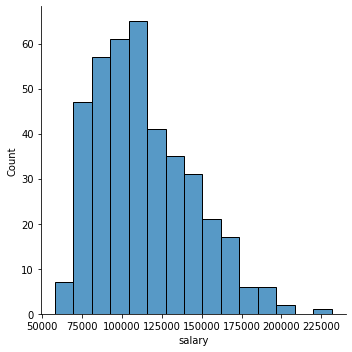

In [ ]:
sns.displot(df['salary'])

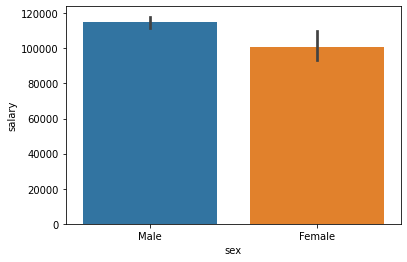

In [ ]:
sns.barplot(x="sex", y="salary", data=df)

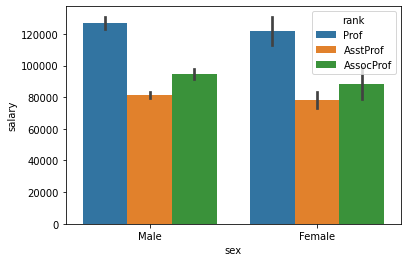

In [ ]:
sns.barplot(x="sex", y="salary", hue="rank", data=df)

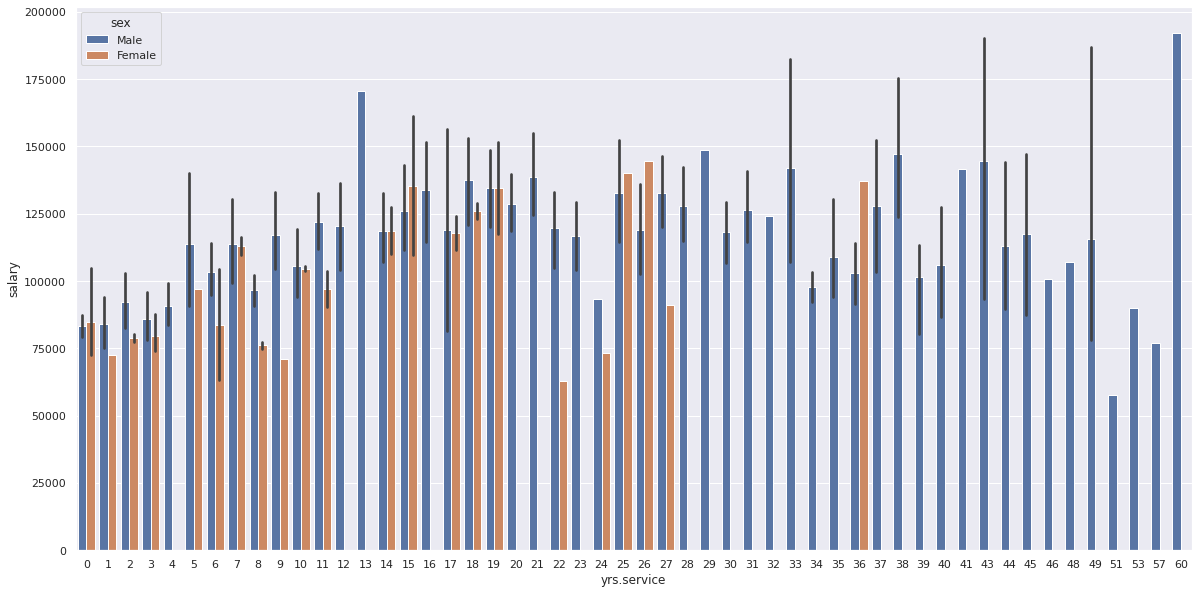

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.barplot(x="yrs.service", y="salary", hue="sex", data=df)


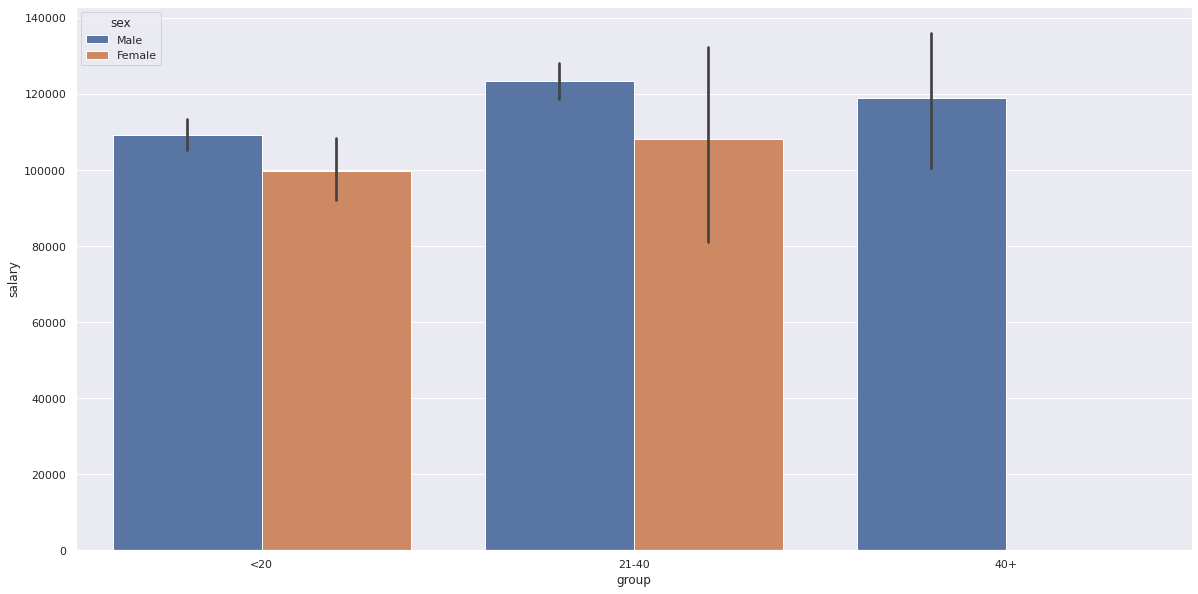

In [ ]:
df.loc[df['yrs.service'] < 20, 'group'] = '<20'
df.loc[(df['yrs.service'] >20) & (df['yrs.service'] < 41), 'group'] = '21-40'
df.loc[df['yrs.service'] >= 41, 'group'] = '40+'
df
sns.barplot(x="group", y="salary", hue="sex", data=df)

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

I found out the men has higher salary than women from this dataset.

I also discovered that female retired early from this dataset. 



